In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from acquire import get_titanic_data
from prepare import prep_titanic,split_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# K Nearest Neighbors

### What is K Nearest Neighbors (KNN)?
- Supervised Algorithm
    - Classification
    - Regression
<br>
<br>
- Makes predictions based on how close a new data point is to known data points.
<br>
<br>
- Lazy Learner: 
    - does no actual training (computations) with the Train data
    - stores the training data
    - computes distance unseen data is from the train data
<br>
<br>
- Works best with smaller samples as opposed to large.
---


## Exercises
work with the `titanic` dataset

In [2]:
df = get_titanic_data()
df = prep_titanic(df)
tr, v, t = split_data(df,'survived')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 11); 59.93%
validate -> (178, 11); 19.98%
test -> (179, 11); 20.09%


,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
128,1,3,female,1,1,22.3583,C,0,0,0,0


In [3]:
# features = ['pclass','sibsp','parch','fare','alone','sex_male','embarked_Q','embarked_S']
features = ['fare','sex_male']

In [4]:
Xtr = tr[features]
Xv = v[features]
Xt = t[features]
ytr = tr.survived
yv = v.survived
yt = t.survived

In [5]:
Xtr.sample()

,fare,sex_male
405,21.0,1


In [6]:
ytr.sample()

658    0
Name: survived, dtype: int64

In [7]:
baseline = (ytr==0).mean()
baseline

0.6161048689138576

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [8]:
k5 = KNeighborsClassifier()
k5.fit(Xtr,ytr)
y_pred = k5.predict(Xtr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [9]:
k5.score(Xtr,ytr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8277153558052435

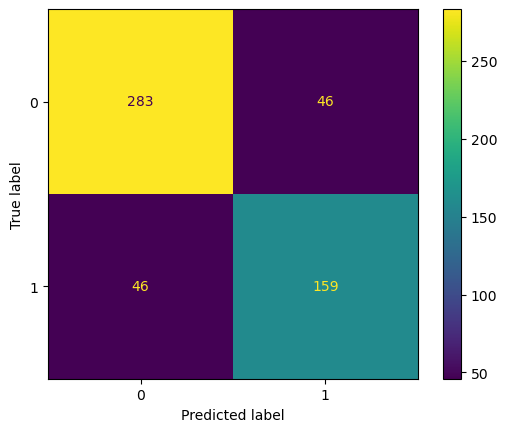

In [10]:
ConfusionMatrixDisplay(confusion_matrix(ytr,y_pred,labels=k5.classes_),display_labels=k5.classes_).plot()
plt.show()

In [11]:
pd.DataFrame(classification_report(ytr,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.860182,0.77561,0.827715,0.817896,0.827715
recall,0.860182,0.77561,0.827715,0.817896,0.827715
f1-score,0.860182,0.77561,0.827715,0.817896,0.827715
support,329.000000,205.00000,0.827715,534.000000,534.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [12]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64
Accuracy: 0.8277153558052435
True Pos Rate: 0.775609756097561
False Pos Rate: 0.1398176291793313
True Neg Rate: 0.8601823708206687
False Neg Rate: 0.22439024390243903
Precision: 0.775609756097561
Recall: 0.775609756097561
F1 Score: 0.775609756097561
Support Pos (1): 205
Support Neg (0): 329


### 4. Run through steps 1-3 setting k to 10



In [13]:
k10 = KNeighborsClassifier(n_neighbors=10)
k10.fit(Xtr,ytr)
y_pred = k10.predict(Xtr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
k10.score(Xtr,ytr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.799625468164794

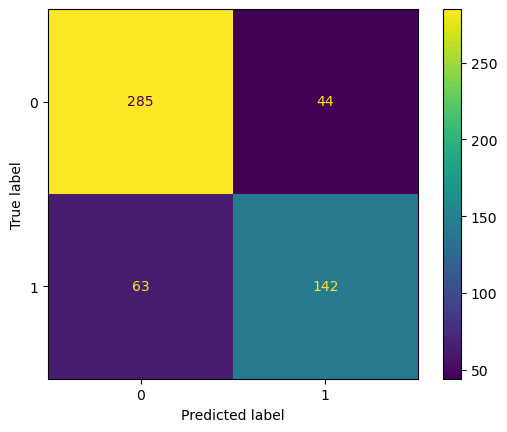

In [15]:
ConfusionMatrixDisplay(confusion_matrix(ytr,y_pred,labels=k10.classes_),display_labels=k10.classes_).plot()
plt.show()

In [16]:
pd.DataFrame(classification_report(ytr,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.818966,0.763441,0.799625,0.791203,0.797650
recall,0.866261,0.692683,0.799625,0.779472,0.799625
f1-score,0.841950,0.726343,0.799625,0.784146,0.797569
support,329.000000,205.000000,0.799625,534.000000,534.000000


In [17]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64
Accuracy: 0.799625468164794
True Pos Rate: 0.6926829268292682
False Pos Rate: 0.1337386018237082
True Neg Rate: 0.8662613981762918
False Neg Rate: 0.3073170731707317
Precision: 0.7634408602150538
Recall: 0.6926829268292682
F1 Score: 0.7263427109974425
Support Pos (1): 205
Support Neg (0): 329


### 5.Run through steps 1-3 setting k to 20



In [18]:
k20 = KNeighborsClassifier(n_neighbors=20)
k20.fit(Xtr,ytr)
y_pred = k20.predict(Xtr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
k20.score(Xtr,ytr)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7602996254681648

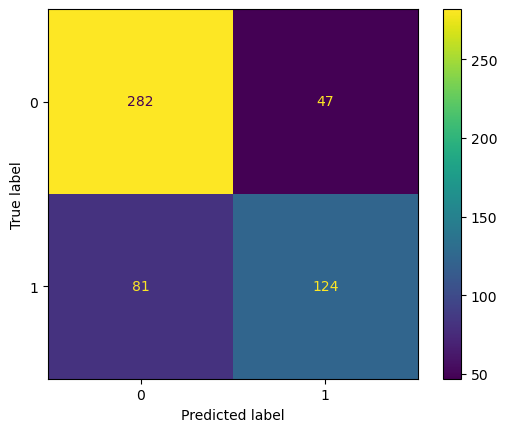

In [20]:
ConfusionMatrixDisplay(confusion_matrix(ytr,y_pred,labels=k20.classes_),display_labels=k20.classes_).plot()
plt.show()

In [21]:
pd.DataFrame(classification_report(ytr,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.776860,0.725146,0.7603,0.751003,0.757007
recall,0.857143,0.604878,0.7603,0.731010,0.760300
f1-score,0.815029,0.659574,0.7603,0.737302,0.755351
support,329.000000,205.000000,0.7603,534.000000,534.000000


In [22]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64
Accuracy: 0.7602996254681648
True Pos Rate: 0.6048780487804878
False Pos Rate: 0.14285714285714285
True Neg Rate: 0.8571428571428571
False Neg Rate: 0.3951219512195122
Precision: 0.7251461988304093
Recall: 0.6048780487804878
F1 Score: 0.6595744680851063
Support Pos (1): 205
Support Neg (0): 329


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [23]:
# default 5 k neighbors best at 82% with only 'fare' and 'sex_male' as features, all features reduced %

### 7. Which model performs best on our out-of-sample data from validate?

In [24]:
import itertools
def knn_scores(Xtr, ytr, Xv, yv):
    #define variables
    metrics = []
    for n, w, a in itertools.product(range(1,21), ['uniform', 'distance'], ['auto', 'ball_tree', 'kd_tree', 'brute']):
        k = KNeighborsClassifier(n_neighbors=n,weights=w,algorithm=a)
        k.fit(Xtr, ytr)
        train_score = k.score(Xtr, ytr)
        validate_score = k.score(Xv, yv)
        # table-ize
        output = {
            'neighbors':n,
            'weight':w,
            'algorithm':a,
            'train_score':train_score,
            'validate_score':validate_score
        }
        metrics.append(output)
    #Put results into a dataframe
    df = pd.DataFrame(metrics)
    # Calculate the difference between the train and validation scores
    df['diff_score'] = abs(df.train_score - df.validate_score)
    df['avg_score'] = (df.train_score + df.validate_score)/2
    return df
def score_plot(data, diff=0.1, score='avg_score', score_v=.7):
    df = data[(data.diff_score<diff)&(data[score]>score_v)].sort_values([score, 'diff_score'], ascending=[False, True]).reset_index()
    df = df.drop(columns='index')
    # plot
    plt.figure(figsize=(8, 5))
    plt.plot(df.index, df.train_score, label='train', marker='o', color='blue')
    plt.plot(df.index, df.validate_score, label='validation', marker='o', color='orange')
    plt.fill_between(df.index, df.train_score, df.validate_score, alpha=0.2, color='gray')
    plt.plot(df.index, df.avg_score, label='avg_score', marker='o', color='black')
    plt.xlabel('index', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Random Forest Classifier Performance', fontsize=18)
    plt.legend(fontsize=12)
    plt.show()
    return df

In [25]:
df = knn_scores(Xtr,ytr,Xv,yv)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [26]:
df

,neighbors,weight,algorithm,train_score,validate_score,diff_score,avg_score
0,1,uniform,auto,0.898876,0.808989,0.089888,0.853933
1,1,uniform,ball_tree,0.898876,0.808989,0.089888,0.853933
2,1,uniform,kd_tree,0.898876,0.808989,0.089888,0.853933
3,1,uniform,brute,0.868914,0.674157,0.194757,0.771536
4,1,distance,auto,0.898876,0.808989,0.089888,0.853933
...,...,...,...,...,...,...,...
155,20,uniform,brute,0.756554,0.764045,0.007491,0.760300
156,20,distance,auto,0.915730,0.769663,0.146067,0.842697
157,20,distance,ball_tree,0.915730,0.769663,0.146067,0.842697
158,20,distance,kd_tree,0.915730,0.769663,0.146067,0.842697


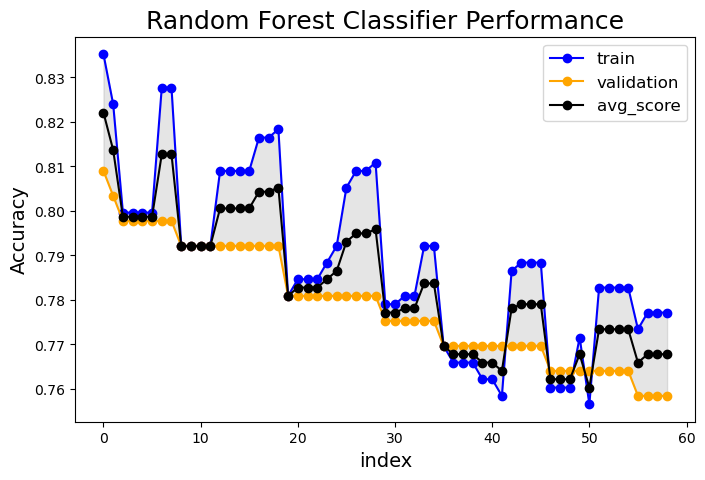

,neighbors,weight,algorithm,train_score,validate_score,diff_score,avg_score
0,5,uniform,brute,0.835206,0.808989,0.026217,0.822097
1,6,uniform,brute,0.823970,0.803371,0.020599,0.813670
2,10,uniform,auto,0.799625,0.797753,0.001873,0.798689
3,10,uniform,ball_tree,0.799625,0.797753,0.001873,0.798689
4,10,uniform,kd_tree,0.799625,0.797753,0.001873,0.798689
5,10,uniform,brute,0.799625,0.797753,0.001873,0.798689
6,5,uniform,auto,0.827715,0.797753,0.029963,0.812734
7,5,uniform,kd_tree,0.827715,0.797753,0.029963,0.812734
8,9,uniform,auto,0.792135,0.792135,0.000000,0.792135
9,9,uniform,ball_tree,0.792135,0.792135,0.000000,0.792135


In [27]:
score_plot(df,.03,'validate_score')

In [28]:
k_test = KNeighborsClassifier(9)
k_test.fit(Xtr,ytr)
baseline,k_test.score(Xtr,ytr),k_test.score(Xv,yv),k_test.score(Xt,yt)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

(0.6161048689138576,
 0.7921348314606742,
 0.7921348314606742,
 0.7318435754189944)

## practice on telco

In [29]:
from acquire import get_telco_data
from prepare import prep_telco

In [30]:
df = get_telco_data()
df = prep_telco(df)
tr,v,t = split_data(df,'churn')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5287,Male,0,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0


In [55]:
features1 = ['senior_citizen','tenure', 'monthly_charges', 'total_charges', 
            'Female', 'partnered', 'has_dependents', 'has_phone_service',
            'does_paperless_billing', 'multiple_lines_No phone service',
            'multiple_lines_Yes', 'online_security_No internet service',
            'online_security_Yes', 'online_backup_No internet service',
            'online_backup_Yes', 'device_protection_No internet service',
            'device_protection_Yes', 'tech_support_No internet service',
            'tech_support_Yes', 'streaming_tv_No internet service',
            'streaming_tv_Yes', 'streaming_movies_No internet service',
            'streaming_movies_Yes', 'contract_type_One year',
            'contract_type_Two year', 'internet_service_type_Fiber optic',
            'internet_service_type_None', 'payment_type_Credit card (automatic)',
            'payment_type_Electronic check', 'payment_type_Mailed check'
            ]

features2 = ['tenure', 'monthly_charges', 'total_charges', 
            'does_paperless_billing', 
            'tech_support_Yes', 'contract_type_One year',
            'contract_type_Two year', 'internet_service_type_Fiber optic',
            'payment_type_Electronic check'
            ]

features3 = ['tenure', 'monthly_charges', 'total_charges'
            ]

In [56]:
Xtr1 = tr[features1]
Xv1 = v[features1]
Xt1 = t[features1]
Xtr2 = tr[features2]
Xv2 = v[features2]
Xt2 = t[features2]
Xtr3 = tr[features3]
Xv3 = v[features3]
Xt3 = t[features3]
ytr = tr.churned
yv = v.churned
yt = t.churned

In [50]:
Xtr.sample()

,tenure,monthly_charges,total_charges
1582,28,76.55,2065.4


In [51]:

ytr.sample()

5289    0
Name: churned, dtype: int64

In [52]:
baseline = (ytr==0).mean()
baseline

0.7346745562130178

In [57]:
df1 = knn_scores(Xtr1,ytr,Xv1,yv)
df2 = knn_scores(Xtr2,ytr,Xv2,yv)
df3 = knn_scores(Xtr3,ytr,Xv3,yv)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

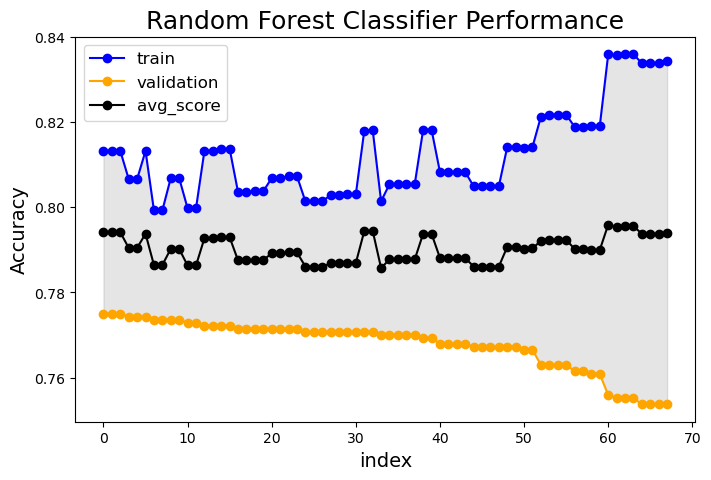

,neighbors,weight,algorithm,train_score,validate_score,diff_score,avg_score
0,10,uniform,auto,0.813254,0.775018,0.038237,0.794136
1,10,uniform,ball_tree,0.813254,0.775018,0.038237,0.794136
2,10,uniform,brute,0.813254,0.775018,0.038237,0.794136
3,12,uniform,auto,0.806627,0.774308,0.032319,0.790468
4,12,uniform,brute,0.806627,0.774308,0.032319,0.790468
...,...,...,...,...,...,...,...
63,4,uniform,brute,0.835976,0.755145,0.080831,0.795561
64,5,uniform,auto,0.833846,0.753726,0.080120,0.793786
65,5,uniform,kd_tree,0.833846,0.753726,0.080120,0.793786
66,5,uniform,brute,0.833846,0.753726,0.080120,0.793786


In [58]:
score_plot(df1,0.1,'validate_score')

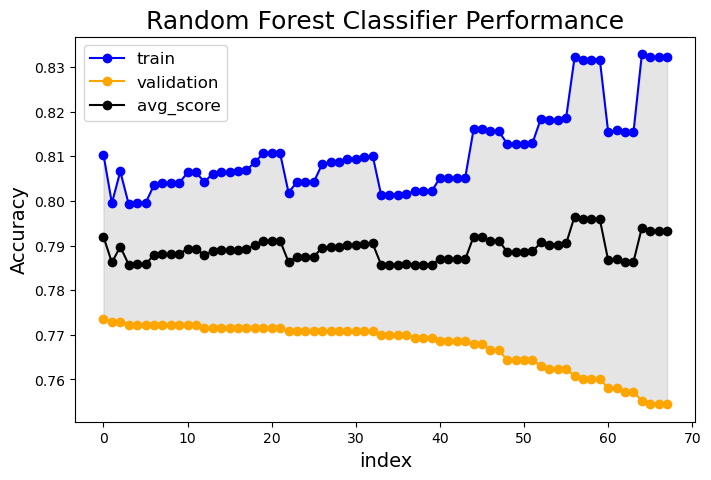

,neighbors,weight,algorithm,train_score,validate_score,diff_score,avg_score
0,10,uniform,brute,0.810414,0.773598,0.036816,0.792006
1,20,uniform,brute,0.799527,0.772889,0.026638,0.786208
2,12,uniform,ball_tree,0.806627,0.772889,0.033739,0.789758
3,20,uniform,ball_tree,0.799290,0.772179,0.027111,0.785734
4,20,uniform,auto,0.799527,0.772179,0.027348,0.785853
...,...,...,...,...,...,...,...
63,6,uniform,kd_tree,0.815385,0.757275,0.058110,0.786330
64,5,uniform,brute,0.832899,0.755145,0.077754,0.794022
65,5,uniform,auto,0.832189,0.754436,0.077754,0.793313
66,5,uniform,ball_tree,0.832189,0.754436,0.077754,0.793313


In [59]:
score_plot(df2,0.1,'validate_score')

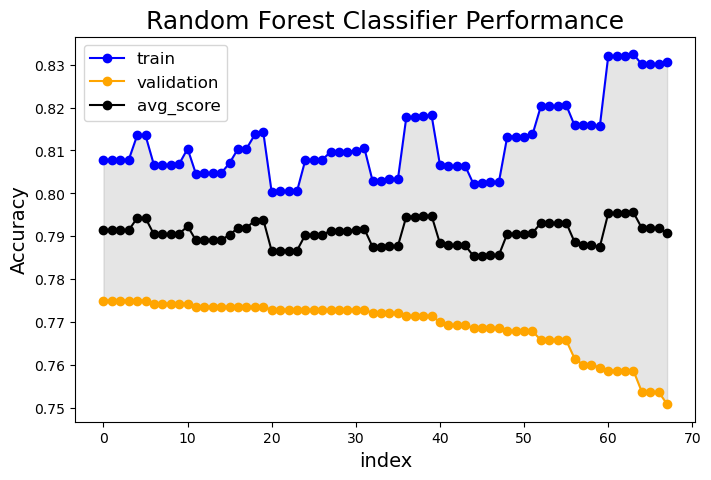

,neighbors,weight,algorithm,train_score,validate_score,diff_score,avg_score
0,12,uniform,auto,0.807811,0.775018,0.032793,0.791414
1,12,uniform,ball_tree,0.807811,0.775018,0.032793,0.791414
2,12,uniform,kd_tree,0.807811,0.775018,0.032793,0.791414
3,12,uniform,brute,0.807811,0.775018,0.032793,0.791414
4,10,uniform,auto,0.813491,0.775018,0.038473,0.794254
...,...,...,...,...,...,...,...
63,5,uniform,brute,0.832426,0.758694,0.073732,0.795560
64,4,uniform,auto,0.830059,0.753726,0.076333,0.791893
65,4,uniform,ball_tree,0.830059,0.753726,0.076333,0.791893
66,4,uniform,kd_tree,0.830059,0.753726,0.076333,0.791893


In [60]:
score_plot(df3,0.1,'validate_score')

In [61]:
KNeighborsClassifier(12).fit(Xtr3,ytr).score(Xt3,yt)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7863733144073811